In [2]:
pip install gffpandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.8/178.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for gffpandas: filename=gffpandas-1.2.0-py2.py3-none-any.whl size=6248 sha256=1465d7f2ec66ceae17def5afd69d39e7c19d9dec7fe59d04742f108f90cfc3a7
  Stored in directory: /Users/macair/Library/Caches/pip/wheels/dd/93/0d/9e478bd07fa27f91ba2ff20b2d69f5ec19367933f772563d0c
Successfully built gffpandas
Note: you may need to restart the kernel to use updated packages.


In [3]:
import gffpandas.gffpandas as gffpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1

### Функция для чтения gff файлов:

In [104]:
def read_gff(file_gff_path):
    annotation = gffpd.read_gff3(file_gff_path)
    annotation_df = annotation.df
    return annotation_df

In [105]:
rrna_annotation = read_gff('rrna_annotation.gff')
rrna_annotation

,seq_id,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


### Функция для чтения bed файлов:

In [29]:
def read_bed6(file_bed_path):
    alingment = pd.read_csv(file_bed_path, sep = '\t', names = ['chromosome', 'start', 'end', 'name', 'score', 'strand'])
    return alingment

In [107]:
read_bed6('alignment.bed')

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


# 1.2

In [106]:
rrna_annotation['attributes'] = rrna_annotation['attributes'].apply(lambda x: x.split('=')[2].split(' ')[0])
rrna_annotation

,seq_id,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


# 1.3

In [78]:
count_rrna_df = rrna_annotation.groupby(['seq_id','attributes']).size().reset_index(name='Count')
count_rrna_df = count_rrna_df.rename(columns = {'seq_id':'Sequence', 'attributes':'RNA type'})
count_rrna_df

,Sequence,RNA type,Count
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
...,...,...,...
71,Reference_8,16S,2
72,Reference_8,23S,2
73,Reference_9,16S,6
74,Reference_9,23S,6


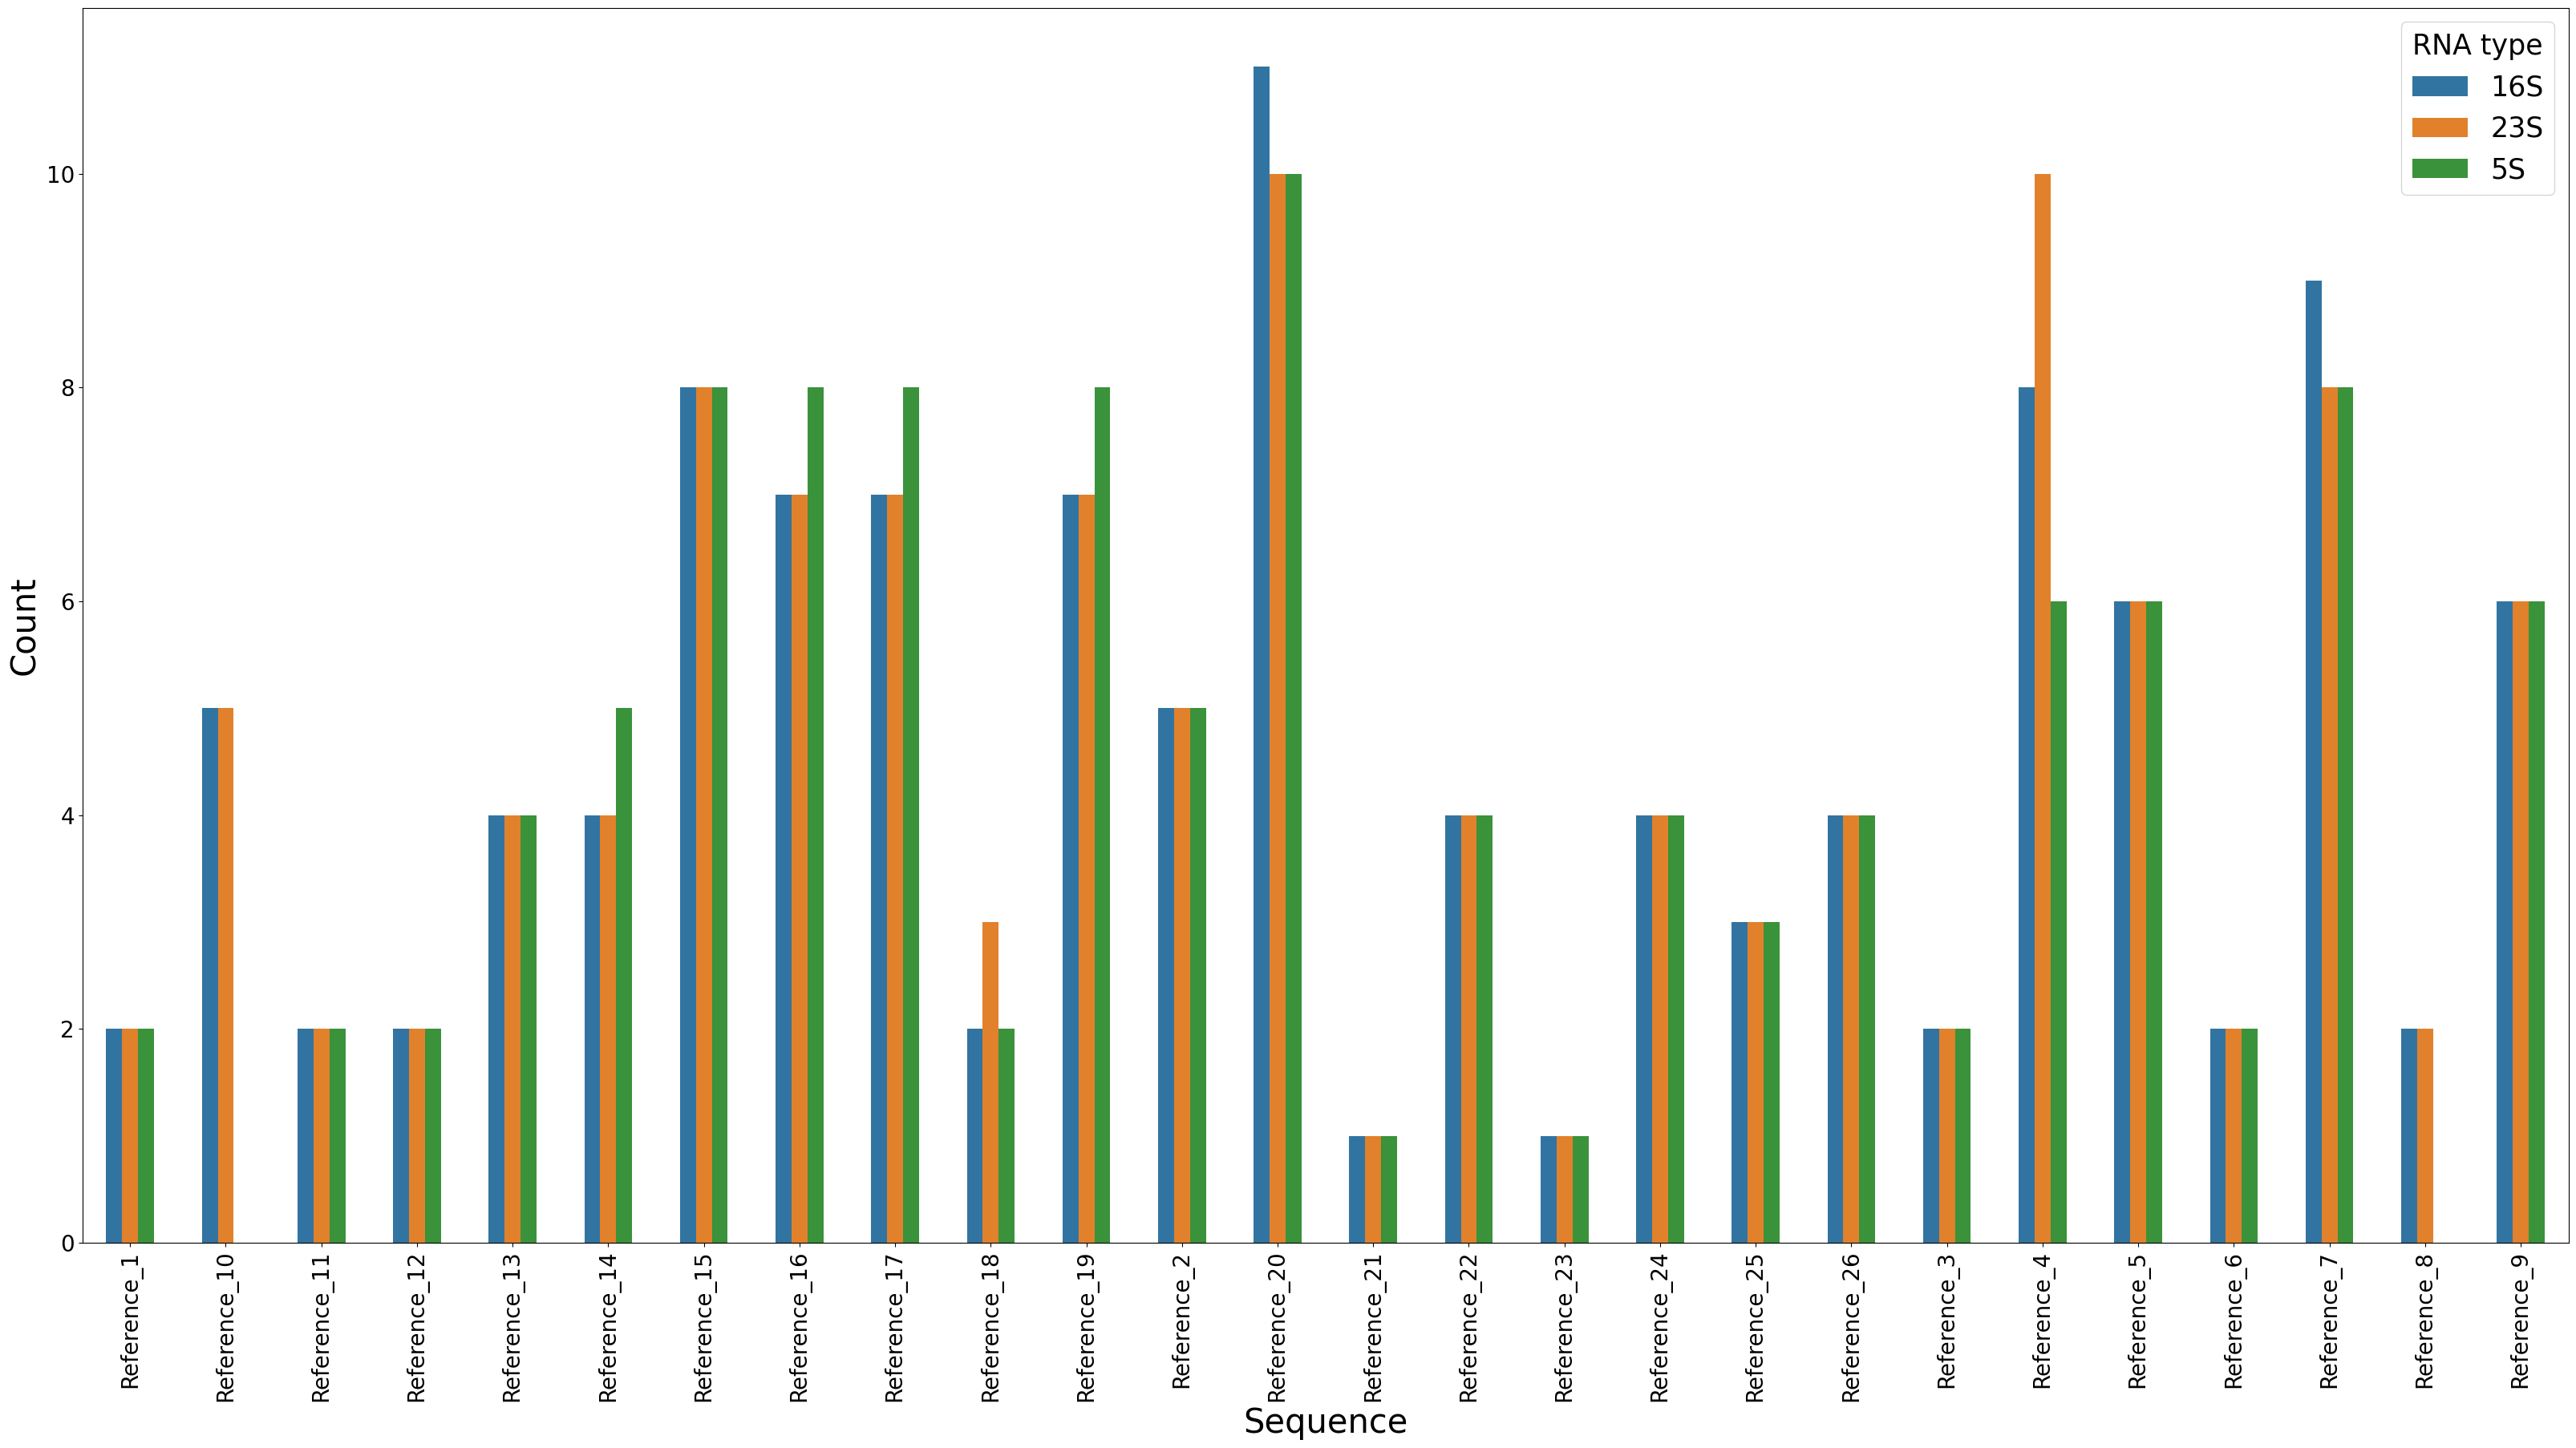

In [98]:
plt.subplots(figsize=(40, 20))
sns.barplot(x="Sequence", y="Count", hue = 'RNA type', data=count_rrna_df, width = 0.5)
plt.xticks(rotation=90, size = 20)
plt.yticks(size = 20)
plt.xlabel('Sequence', size=30)
plt.ylabel('Count', size=30)
plt.legend(title="RNA type", fontsize=25, title_fontsize=25)

# 2

### Считываем данные:

In [4]:
diffexpr_data = pd.read_csv('diffexpr_data.tsv.gz', sep = '\t')
diffexpr_data

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


### Записываем в новый массив значения logFC, где p-value > 0.05:

In [12]:
logFC = diffexpr_data.query('log_pval > 0.05')['logFC']

### Находим значения logFC топ-2 генов, значимо снизивших экспрессию, и топ-2 генов, значимо увеличивших экспрессию:

In [22]:
logFC_sorted = sorted(logFC)

In [26]:
A_min = logFC_sorted[0]
B_min = logFC_sorted[1]
print(A_min, B_min)

-10.661092815248146 -9.196480736032145


In [25]:
A_max = logFC_sorted[-1]
B_max = logFC_sorted[-2]
print(A_max, B_max)

4.6172414615497415 4.5719153784763975


### Находим значения p-value, соответствующие полученным значениям logFC:

In [49]:
Ap_min = diffexpr_data[diffexpr_data['logFC'] == A_min]['log_pval']
A_pval_min = Ap_min.to_list()[0]

In [50]:
Bp_min = diffexpr_data[diffexpr_data['logFC'] == B_min]['log_pval']
B_pval_min = Bp_min.to_list()[0]

In [51]:
Ap_max = diffexpr_data[diffexpr_data['logFC'] == A_max]['log_pval']
A_pval_max = Ap_max.to_list()[0]

In [52]:
Bp_max = diffexpr_data[diffexpr_data['logFC'] == B_max]['log_pval']
B_pval_max = Bp_max.to_list()[0]

### Находим названия генов:

In [54]:
Ag_min = diffexpr_data[diffexpr_data['logFC'] == A_min]['Sample']
A_gene_min = Ag_min.to_list()[0]

In [55]:
Bg_min = diffexpr_data[diffexpr_data['logFC'] == B_min]['Sample']
B_gene_min = Bg_min.to_list()[0]

In [56]:
Ag_max = diffexpr_data[diffexpr_data['logFC'] == A_max]['Sample']
A_gene_max = Ag_max.to_list()[0]

In [57]:
Bg_max = diffexpr_data[diffexpr_data['logFC'] == B_max]['Sample']
B_gene_max = Bg_max.to_list()[0]

### Строим violent plot:

Text(4, 10, 'ZIC2')

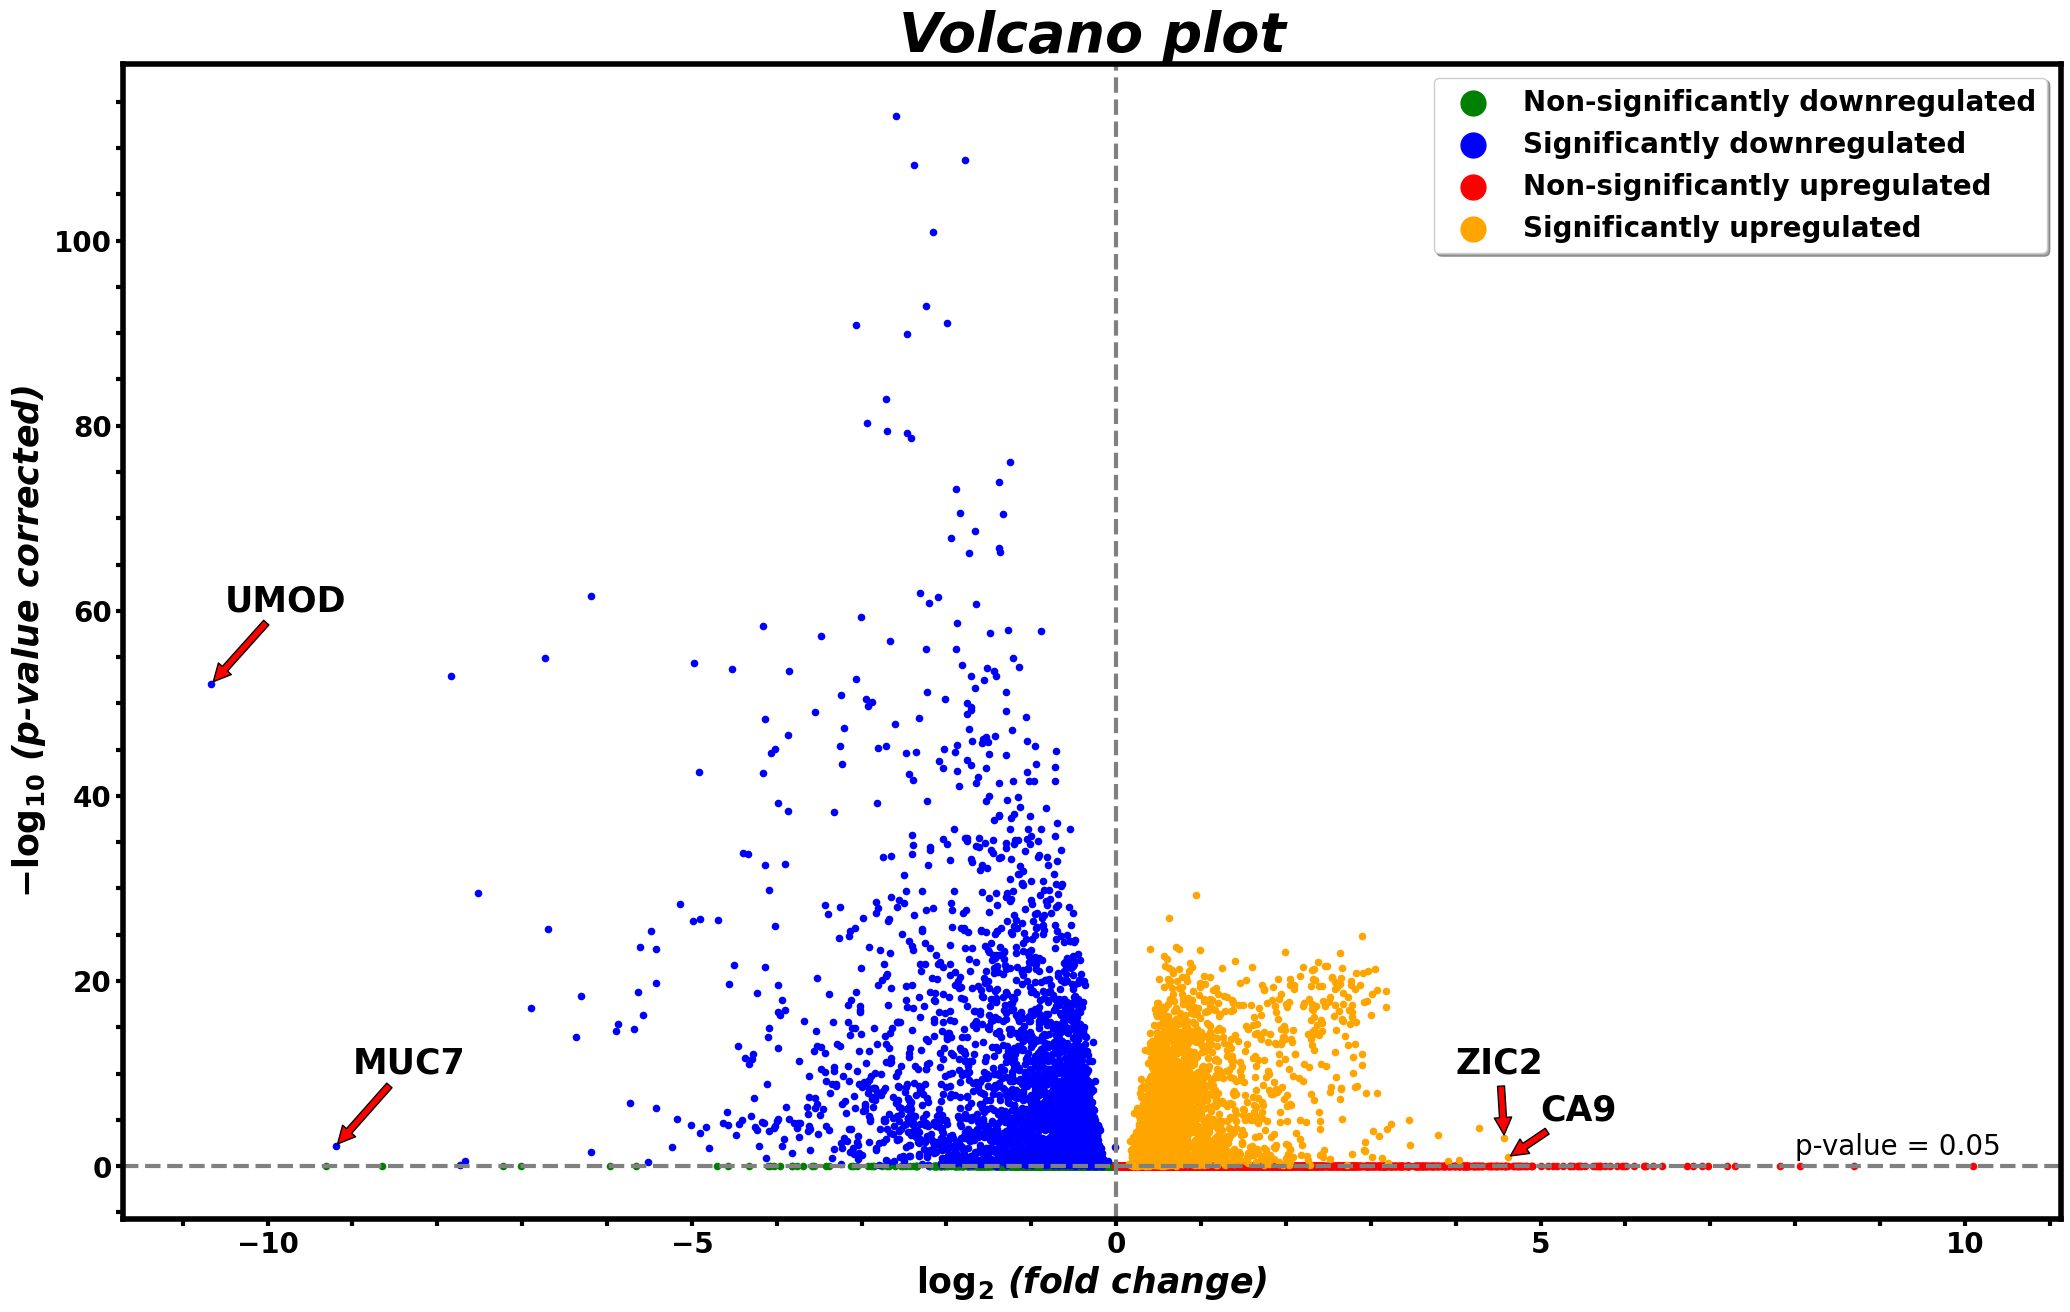

In [118]:
fig, ax = plt.subplots(figsize=(25, 15))
plt.rc('font')

down_left = diffexpr_data[(diffexpr_data['logFC']<=0)&(diffexpr_data['log_pval']<=0.05)]
up_left = diffexpr_data[(diffexpr_data['logFC']<=0)&(diffexpr_data['log_pval']>=0.05)]
down_right = diffexpr_data[(diffexpr_data['logFC']>=0)&(diffexpr_data['log_pval']<=0.05)]
up_right = diffexpr_data[(diffexpr_data['logFC']>=0)&(diffexpr_data['log_pval']>=0.05)]

plt.scatter(x=down_left['logFC'],y=down_left['log_pval'],s=20,label="Non-significantly downregulated",color="green")
plt.scatter(x=up_left['logFC'],y=up_left['log_pval'],s=20,label="Significantly downregulated",color="blue")
plt.scatter(x=down_right['logFC'],y=down_right['log_pval'],s=20,label="Non-significantly upregulated",color="red")
plt.scatter(x=up_right['logFC'],y=up_right['log_pval'],s=20,label="Significantly upregulated",color="orange")

# Устанавливаем название и параметры осей
#plt.rc('axes', linewidth=4)
plt.xlabel(r'$\bf{log_2}$ (fold change)', size = 25, fontweight = 'bold', style='italic')
plt.ylabel(r'$\bf{- log_{10}}$ (p-value corrected)', size = 25, fontweight = 'bold', style='italic')
plt.rcParams["axes.labelweight"] = "bold"

# Устанавливаем ticks
plt.xticks(size = 20, fontweight = 'bold')
plt.yticks(size = 20, fontweight = 'bold')
plt.minorticks_on()
plt.tick_params(axis="x", which="minor", length=5, width=3)
plt.tick_params(axis="y", which="minor", length=5, width=3)
plt.tick_params(axis="x", which="major", length=5, width=3)
plt.tick_params(axis="y", which="major", length=5, width=3)

# Название графика:
plt.title("Volcano plot", size = 40, fontweight = 'bold', style='italic')

# Пунктирные линии:
plt.axvline(0,color="grey",linestyle="--", linewidth = 3)
plt.axhline(0.05,color="grey",linestyle="--", linewidth = 3)
plt.text(8, 1.2, 'p-value = 0.05', fontsize = 20, fontweight = 'normal')

# Легенда
plt.legend(prop = {'weight':'bold', 'size':20}, markerscale=4, shadow=True)

# Аннотируем гены
ax.annotate(A_gene_min, xy = (A_min, A_pval_min), size = 25, xytext=(-10.5, 60), weight='bold',
            arrowprops=dict(arrowstyle='simple', fc='red', lw=1))
ax.annotate(B_gene_min, xy = (B_min, B_pval_min), size = 25, xytext=(-9, 10), weight='bold',
            arrowprops=dict(arrowstyle='simple', fc='red', lw=1))
ax.annotate(A_gene_max, xy = (A_max, A_pval_max), size = 25, xytext=(5, 5), weight='bold',
            arrowprops=dict(arrowstyle='simple', fc='red', lw=1))
ax.annotate(B_gene_max, xy = (B_max, B_pval_max), size = 25, xytext=(4, 10), weight='bold',
            arrowprops=dict(arrowstyle='simple', fc='red', lw=1))

# 3

### Pie chart

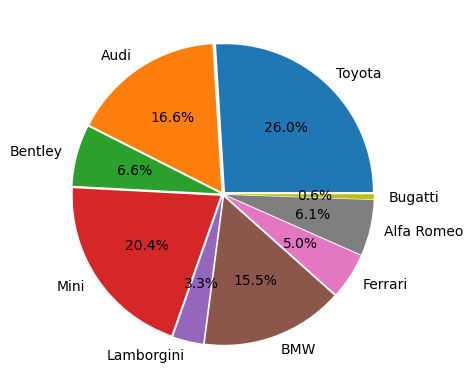

In [172]:
data_set = np.array([47, 30, 12, 37, 6, 28, 9, 11, 1])
my_labels = ["Toyota", "Audi", "Bentley", "Mini", "Lamborgini", "BMW", "Ferrari", "Alfa Romeo", "Bugatti"]
explode = [0.02]*len(data_set)

plt.pie(data_set, labels = my_labels, explode=explode, )
plt.show()